In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/dacon/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dacon/따릉이/test.csv')

# EDA

In [ ]:
train
# 모두 Numerical Data이다.

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [ ]:
test

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [ ]:
import copy

In [ ]:
df_train = copy.copy(train)
df_test = copy.copy(test)

In [ ]:
df_train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [ ]:
print(df_train.isnull().sum(),'\n')
print(df_test.isnull().sum())

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64 

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


In [ ]:
df_train[df_train['hour_bef_ozone'].isnull()]
# 결측치를 살펴 봤을 때, 오존/미세먼지는 보통 같이 결측치이다.-> 결측 장비가 없을 땐 다같이 없는 경우가 많은 듯.
# 결측치가 테스트 셋에도 있으므로 drop보다는 평균치를 채워주는 쪽으로 하자.
# hair et al.(2006)에 따른 비율별 결측치 처리에 관해 살펴보면, 10% 이하 결측치는 Imputation/interpolation 이 유효하다

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


In [ ]:
df_train = df_train.fillna({'hour_bef_precipitation':0})
# 강우 결측치 제거
# 원래는 Visibility 와 Humidity와의 관계에 맞추어 제거해야한다.

In [ ]:
for i in range(0,11) :
  df_train = df_train.fillna({df_train.columns[i]:df_train[df_train.columns[i]].mean()})
for i in range(0,10) :
  df_test = df_test.fillna({df_test.columns[i]:df_test[df_test.columns[i]].mean()})

In [ ]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())
# 결측치 제거 완료

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64
id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   float64
 4   hour_bef_windspeed      1459 non-null   float64
 5   hour_bef_humidity       1459 non-null   float64
 6   hour_bef_visibility     1459 non-null   float64
 7   hour_bef_ozone          1459 non-null   float64
 8   hour_bef_pm10           1459 non-null   float64
 9   hour_bef_pm2.5          1459 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [ ]:
# 상관행렬 파악하기
df_train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056401,-0.003343,-0.017944,0.008948,0.054001,-0.024834,0.003418,-0.002131
hour,-0.010901,1.000000,0.406797,0.021708,0.460624,-0.329200,0.176271,0.368945,-0.033855,-0.057212,0.626047
hour_bef_temperature,-0.000029,0.406797,1.000000,-0.097054,0.375223,-0.496088,0.197417,0.530267,-0.003727,-0.074866,0.618892
hour_bef_precipitation,-0.056401,0.021708,-0.097054,1.000000,0.022744,0.276475,-0.217150,-0.060404,-0.048439,0.004426,-0.163580
hour_bef_windspeed,-0.003343,0.460624,0.375223,0.022744,1.000000,-0.432773,0.251598,0.511100,0.009881,-0.191462,0.458624
hour_bef_humidity,-0.017944,-0.329200,-0.496088,0.276475,-0.432773,1.000000,-0.592244,-0.411417,-0.104700,0.159193,-0.470754
hour_bef_visibility,0.008948,0.176271,0.197417,-0.217150,0.251598,-0.592244,1.000000,0.098962,-0.389383,-0.612117,0.298847
hour_bef_ozone,0.054001,0.368945,0.530267,-0.060404,0.511100,-0.411417,0.098962,1.000000,0.111571,0.016893,0.468719
hour_bef_pm10,-0.024834,-0.033855,-0.003727,-0.048439,0.009881,-0.104700,-0.389383,0.111571,1.000000,0.474259,-0.110884
hour_bef_pm2.5,0.003418,-0.057212,-0.074866,0.004426,-0.191462,0.159193,-0.612117,0.016893,0.474259,1.000000,-0.129398


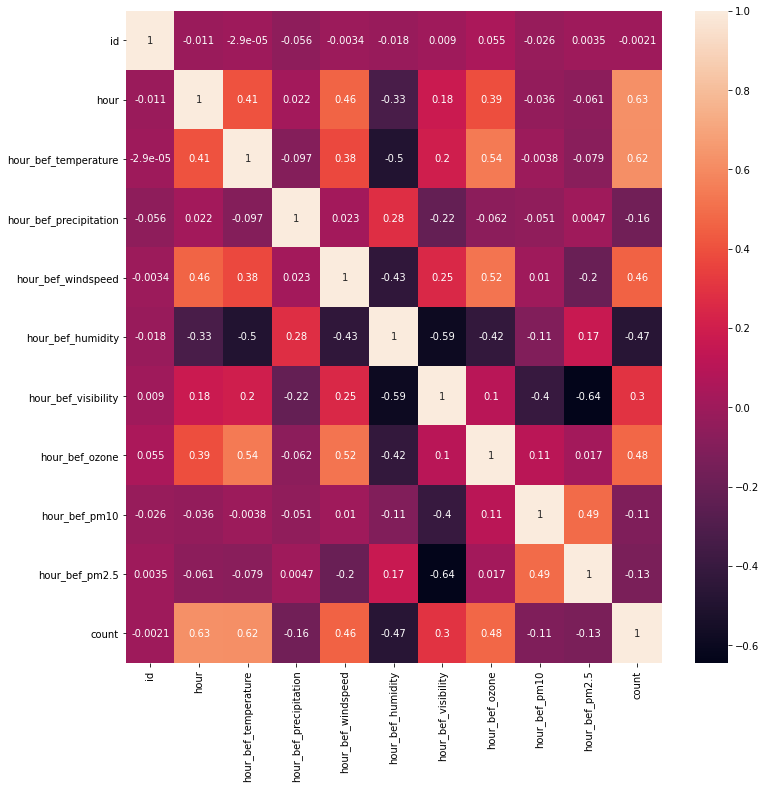

In [ ]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True)
plt.show()

# 시각화

In [ ]:
def boxplt(features) :
  plt.figure(figsize = (8, 4))
  sns.boxplot(x = features, y = df_train.columns[-1], data = df_train)
  plt.show()

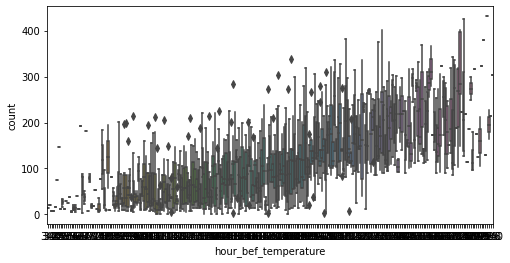

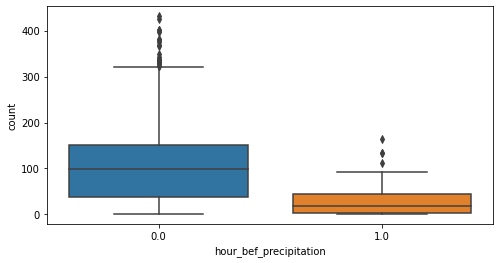

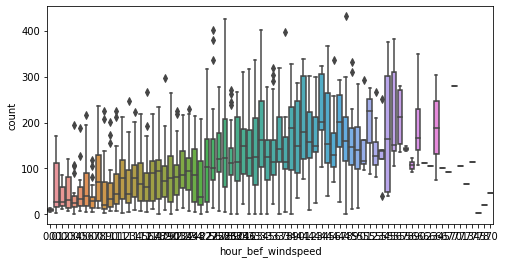

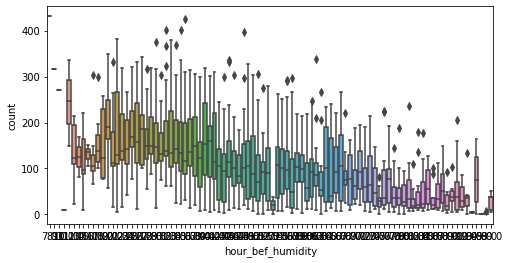

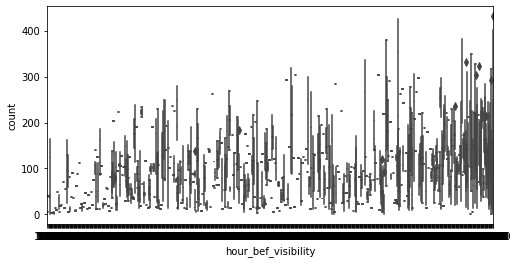

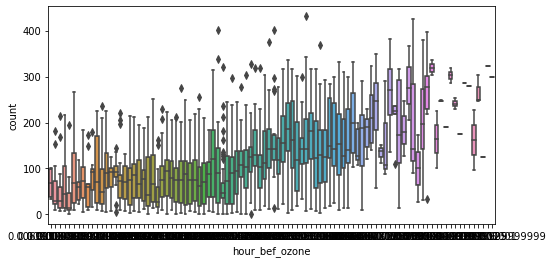

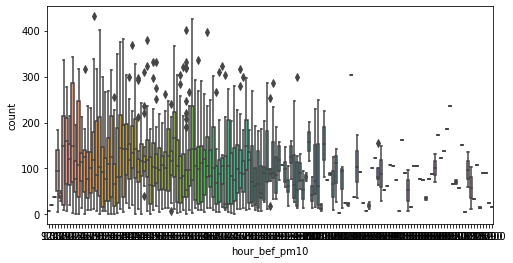

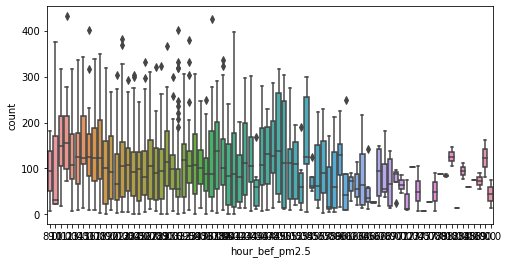

In [ ]:
for i in range(2,10) :
  boxplt(df_train.columns[i])

In [ ]:
# 다시 보니, 강수여부는 범주형 데이터이다. 비가 안온 날이 더 많으므로, 0으로 바꿔주자

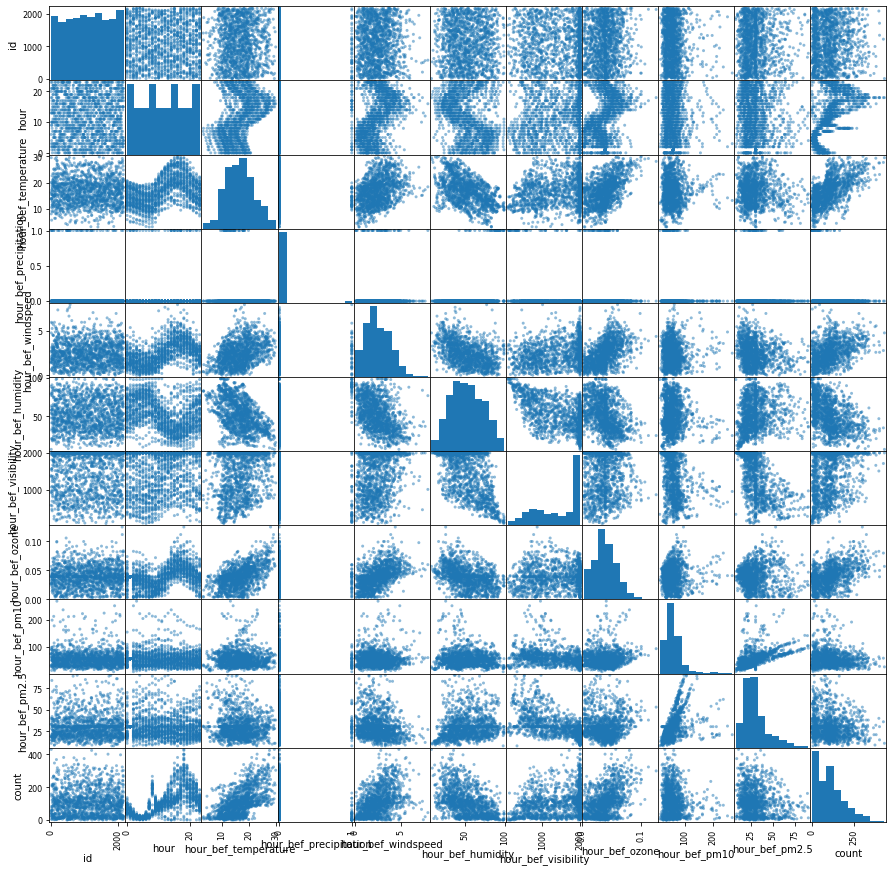

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_train,figsize = (15,15))
plt.show()

# 데이터 정규화/전처리 - AutoML로 대체

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_train = df_train.drop('id', axis = 1)
df_test = df_test.drop('id', axis = 1)

In [ ]:
df_train_features = df_train.loc[:,'hour':'hour_bef_pm2.5']
df_test_features = df_test.loc[:,'hour':'hour_bef_pm2.5']

df_train_lables = df_train.loc[:,'count']

In [ ]:
train_features_scaled = StandardScaler().fit_transform(df_train_features)
test_features_scaled = StandardScaler().fit_transform(df_test_features)

Visibility의 이상치들을 없애고 싶은데,, 어떻게 하지?

# 교차검증을 사용한 평가  - AutoML로 대체

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

linreg = LinearRegression()
RFR = RandomForestRegressor()

In [ ]:
score1 = cross_val_score(linreg,train_features_scaled,df_train_lables,scoring = 'neg_mean_squared_error',cv = 5 )
score2 = cross_val_score(RFR,train_features_scaled,df_train_lables,scoring = 'neg_mean_squared_error',cv = 5 )
linscore = np.sqrt(score1)
rfrscore = np.sqrt(score2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [ ]:
def dpl(score) :
  print('점수 :', score)
  print('평균 :', score.mean())
  print('표준편차 :', score.std())

In [ ]:
dpl(score1)

점수 : [-2562.57113488 -3692.69823044 -2511.76310489 -2925.31123697
 -2160.84858846]
평균 : -2770.6384591278343
표준편차 : 520.820513594118


In [ ]:
dpl(score2)

점수 : [-1500.63861096 -1732.23353562 -1346.08992705 -1565.31644692
 -1407.13284055]
평균 : -1510.2822722195547
표준편차 : 134.15144827782686


# RFR 모델 세부 튜닝 -  - AutoML로 대체

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param = {'min_samples_split': range(30, 70),
        'max_depth': range(5,11),
        'n_estimators': range(50, 250)}

In [ ]:
RFM = RandomForestRegressor()

In [ ]:
Paramsearch = RandomizedSearchCV(estimator=RFM, param_distributions=param, n_iter = 30, random_state=42, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [ ]:
Paramsearch.fit(train_features_scaled, df_train_lables)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [ ]:
Paramsearch.best_params_

{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 73}

In [ ]:
model = RandomForestRegressor(max_depth= 7, min_samples_split= 30, n_estimators= 73)

In [ ]:
model.fit(train_features_scaled, df_train_lables)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      n_estimators=73, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
prediction = model.predict(test_features_scaled)

In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/dacon/따릉이/submission.csv의 사본', engine='python')

In [ ]:
sub

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [ ]:
sub['count'] = prediction

In [ ]:
sub

,id,count
0,0,56.729711
1,1,222.035137
2,2,38.960189
3,4,26.388579
4,5,35.810944
...,...,...
710,2148,59.812814
711,2149,41.008300
712,2165,96.512807
713,2166,173.758958


In [ ]:
sub.to_csv("./submission.csv", index=False)
# 점수 61.6

NameError: ignored

# AutoML

In [ ]:
from pycaret.regression import *

In [ ]:
model = setup(
    data = df_train,
    target='count'
)

,Description,Value
0,session_id,2734
1,Target,count
2,Original Data,"(1459, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 9)"


In [ ]:
compare_models(exclude=None,
               include = None,
               fold = 10,
               round=4,
               n_select = 1 )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,25.6101,1403.8370,37.2749,0.7915,0.4816,0.6047,0.511
catboost,CatBoost Regressor,25.8502,1435.4159,37.6866,0.7872,0.5220,0.6641,1.365
lightgbm,Light Gradient Boosting Machine,26.9718,1556.0654,39.2369,0.7687,0.5616,0.7542,0.317
rf,Random Forest Regressor,27.1632,1564.5394,39.4188,0.7674,0.5108,0.6988,0.660
gbr,Gradient Boosting Regressor,28.0862,1629.3259,40.1268,0.7593,0.5370,0.7242,0.135
lr,Linear Regression,39.8213,2783.0885,52.5666,0.5894,0.7768,1.1936,0.265
lar,Least Angle Regression,39.8213,2783.0909,52.5667,0.5894,0.7768,1.1936,0.014
ada,AdaBoost Regressor,43.1429,2761.1511,52.4285,0.5892,0.8373,1.7827,0.113
ridge,Ridge Regression,39.8728,2790.9649,52.6402,0.5883,0.7768,1.1948,0.013
br,Bayesian Ridge,39.9116,2808.4382,52.8175,0.5857,0.7894,1.2626,0.015


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2734, verbose=0, warm_start=False)

In [ ]:
  models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
myet = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,23.6921,1309.0990,36.1815,0.7872,0.3524,0.3093
1,29.0553,1548.4649,39.3505,0.7476,0.4470,0.4515
2,29.0271,2179.7240,46.6875,0.7185,0.5230,0.6517
3,25.1403,1440.8592,37.9587,0.7699,0.6046,0.9381
4,25.4628,1407.6143,37.5182,0.8052,0.5241,0.6795
5,24.5853,1232.2442,35.1033,0.8469,0.5879,0.9796
6,21.4924,1025.3583,32.0212,0.8484,0.4986,0.6523
7,28.9442,1502.7921,38.7659,0.7851,0.5051,0.6233
8,25.2607,1231.7323,35.0960,0.7753,0.4512,0.4694
9,23.4410,1160.4817,34.0658,0.8311,0.3224,0.2923


In [ ]:
et_tuned = tune_model(myet, optimize = 'RMSE',n_iter = 50
                      )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,24.6728,1352.8306,36.7808,0.7800,0.3579,0.3218
1,30.6467,1639.5366,40.4912,0.7327,0.4519,0.4623
2,30.6758,2232.9316,47.2539,0.7117,0.5948,0.8831
3,26.2877,1597.2663,39.9658,0.7449,0.6227,1.0420
4,26.7011,1498.8899,38.7155,0.7926,0.5468,0.7744
5,27.5454,1583.1456,39.7888,0.8033,0.6303,1.2079
6,24.9891,1421.7295,37.7058,0.7898,0.5398,0.7544
7,30.4619,1602.9698,40.0371,0.7708,0.5258,0.6802
8,25.4734,1170.2644,34.2091,0.7866,0.5281,0.6568
9,24.8558,1338.7052,36.5883,0.8052,0.3471,0.3133


In [ ]:
et_tuned

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=10, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.3,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=9, min_weight_fraction_leaf=0.0,
                    n_estimators=240, n_jobs=-1, oob_score=False,
                    random_state=2734, verbose=0, warm_start=False)

In [ ]:
et_tuned.fit(df_train_features, df_train_lables)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=10, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.3,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=9, min_weight_fraction_leaf=0.0,
                    n_estimators=240, n_jobs=-1, oob_score=False,
                    random_state=2734, verbose=0, warm_start=False)

In [ ]:
predict = et_tuned.predict(df_test_features)
sub = pd.read_csv('/content/drive/MyDrive/dacon/따릉이/submission.csv의 사본', engine='python')
sub['count'] = predict
sub

,id,count
0,0,99.926061
1,1,235.378708
2,2,56.264065
3,4,57.658866
4,5,48.536836
...,...,...
710,2148,68.169975
711,2149,60.340304
712,2165,115.990887
713,2166,160.248177


In [ ]:
sub.to_csv("./submission.csv", index=False)
# 점수 49.8

# AutoML 2번째 트라이

In [ ]:
pip install pycaret

     |████████████████████████████████| 256kB 5.7MB/s 
     |████████████████████████████████| 276kB 18.9MB/s 
     |████████████████████████████████| 1.8MB 24.6MB/s 
     |████████████████████████████████| 65.8MB 43kB/s 
     |████████████████████████████████| 174kB 38.2MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 6.8MB 40.2MB/s 
     |████████████████████████████████| 245kB 43.9MB/s 
     |████████████████████████████████| 1.6MB 41.1MB/s 
     |████████████████████████████████| 14.2MB 139kB/s 
     |████████████████████████████████| 157.5MB 91kB/s 
     |████████████████████████████████| 2.1MB 36.1MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 3.1MB 35.3MB/s 
     |████████████████████████████████| 604kB 37.7MB/s 
     |████████████████████████████████| 153kB 39.8MB/s 
     |████████████████████████████████| 163kB 43.6MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 

In [ ]:
from pycaret.regression import *

In [ ]:
model = setup(
    data = df_train,
    target='count'
)

,Description,Value
0,session_id,600
1,Target,count
2,Original Data,"(1459, 11)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 10)"


In [ ]:
best_model = compare_models(exclude=None,
               include = None,
               fold = 10,
               round=4,
               n_select = 1 )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,25.3910,1417.4591,37.5378,0.7841,0.5159,0.8299,0.517
catboost,CatBoost Regressor,26.4084,1477.6792,38.3806,0.7744,0.5641,0.8892,1.598
rf,Random Forest Regressor,26.7846,1581.3562,39.6769,0.7592,0.5382,0.9202,0.662
lightgbm,Light Gradient Boosting Machine,27.3588,1631.1809,40.3113,0.7506,0.5774,0.9639,0.078
gbr,Gradient Boosting Regressor,27.9810,1636.4083,40.3545,0.7489,0.5776,0.9580,0.150
xgboost,Extreme Gradient Boosting,27.3188,1703.7653,41.0380,0.7421,0.5402,0.8527,4.684
ada,AdaBoost Regressor,42.6865,2667.9797,51.5923,0.5915,0.8681,1.9406,0.136
lr,Linear Regression,39.1177,2720.3019,52.0551,0.5834,0.7929,1.3129,0.312
lar,Least Angle Regression,39.1177,2720.3035,52.0551,0.5834,0.7929,1.3129,0.018
ridge,Ridge Regression,39.2317,2741.0396,52.2453,0.5802,0.7831,1.3089,0.016


In [ ]:
best_model_tuned = tune_model(best_model, optimize = 'RMSE',n_iter = 100
                      )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,25.8349,1548.0040,39.3447,0.7805,0.5182,0.6741
1,23.7717,1333.9537,36.5233,0.7900,0.6315,1.0226
2,26.6807,1409.2875,37.5405,0.7467,0.4520,0.5249
3,28.4708,1908.0982,43.6818,0.7524,0.5202,0.6352
4,26.0224,1682.7169,41.0209,0.7355,0.5355,0.8371
5,25.2144,1321.9106,36.3581,0.8190,0.4623,0.4347
6,27.8065,1598.2165,39.9777,0.7819,0.3733,0.3356
7,26.1897,1463.8398,38.2602,0.7860,0.6097,1.1188
8,24.9298,1203.4223,34.6904,0.7809,0.4987,0.7502
9,25.1367,1483.7611,38.5196,0.7466,0.6634,2.5988


In [ ]:
best_model_tuned.fit(df_train_features, df_train_lables)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=11, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.02,
                    min_impurity_split=None, min_samples_leaf=3,
                    min_samples_split=9, min_weight_fraction_leaf=0.0,
                    n_estimators=260, n_jobs=-1, oob_score=False,
                    random_state=600, verbose=0, warm_start=False)

In [ ]:
predict = best_model_tuned.predict(df_test_features)
sub = pd.read_csv('/content/drive/MyDrive/dacon/따릉이/submission.csv의 사본', engine='python')
sub['count'] = predict
sub.to_csv("./submission.csv", index=False)
sub
# 점수 49.8

,id,count
0,0,95.448077
1,1,220.765385
2,2,52.867308
3,4,44.411538
4,5,48.863462
...,...,...
710,2148,61.742308
711,2149,54.090385
712,2165,111.446154
713,2166,165.557692
